# Introduction

In [1]:
# Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Defined Functions Used

In [2]:
def identify_blanks(df):
    t = len(df)
    for each in df.columns:
        i = len(df.loc[df[each].isnull()])
        pct = int((i/t)*100)
        print(f'Column {each} has {i} missing values out of {t}.  {pct}%')
        
# define module to create frequency distribution of variables
def freq_dist(df, col):
    df_fd = pd.DataFrame(data=df[col].value_counts())
    df_fd['pct_total'] = df_fd[col] / df_fd[col].sum()
    print(df_fd.head(15))

    
#Creates Histogram for Comparitive Purposes
def review_detail(df, col, num, col2, num2, sub, meas, type1, stack):    
    if type1 == 'all':
        df_last_month = df.loc[(df[col] != num) & (df[col2] == num2)]
        df_last_month = df_last_month.groupby(by=[col, col2, 'Survived']).agg({'Survived':meas})
        df_last_month.rename(columns = {'index':'index'}, inplace=True)
        df_last_month['pct_total'] = ((df_last_month['Survived'] / df_last_month['Survived'].sum())*100).astype(int)
        df_last_month = pd.DataFrame(df_last_month)
        df_last_month = df_last_month.T
        print(df_last_month)
        df_last_month.drop_duplicates(inplace=True)
        df_last_month = df_last_month.T
        df_last_month.drop(columns=['pct_total'], inplace=True)


        df_last_month.unstack().plot(kind='bar', use_index=True, rot=0, 
                                     subplots=sub, stacked=stack)       
    else:
        df_last_month = df.loc[(df[col] != num) & (df[col2] != num2)]
        df_last_month = df_last_month.groupby(by=[col, col2, 'Survived']).agg({'Survived':meas})
        df_last_month.rename(columns = {'index':'index'}, inplace=True)
        df_last_month['pct_total'] = ((df_last_month['Survived'] / df_last_month['Survived'].sum())*100).astype(int)
        df_last_month = pd.DataFrame(df_last_month)
        df_last_month = df_last_month.T
        print(df_last_month)
        df_last_month.drop_duplicates(inplace=True)
        df_last_month = df_last_month.T
        df_last_month.drop(columns=['pct_total'], inplace=True)


        df_last_month.unstack().plot(kind='bar', use_index=True, rot=0, 
                                     subplots=sub, stacked=stack) 

# Import and read data

In [3]:
#Import the data:
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/raw/train.csv')
ss = pd.read_csv('../data/raw/gender_submission.csv')

# Exploratory Data Analysis (EDA)

## 4.1 Data types, missing data and summary statistics

In [4]:
print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', 
      train.isnull().sum().sort_values(ascending = False))
print('\n'+40*'-'+'\n')
print('Shape of test dataset:', test.shape, '\nMissing values for test dataset below:\n',
      test.isnull().sum().sort_values(ascending = False))

Shape of train dataset: (891, 12) 
Missing values for train dataset below:
 Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

----------------------------------------

Shape of test dataset: (418, 11) 
Missing values for test dataset below:
 Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64


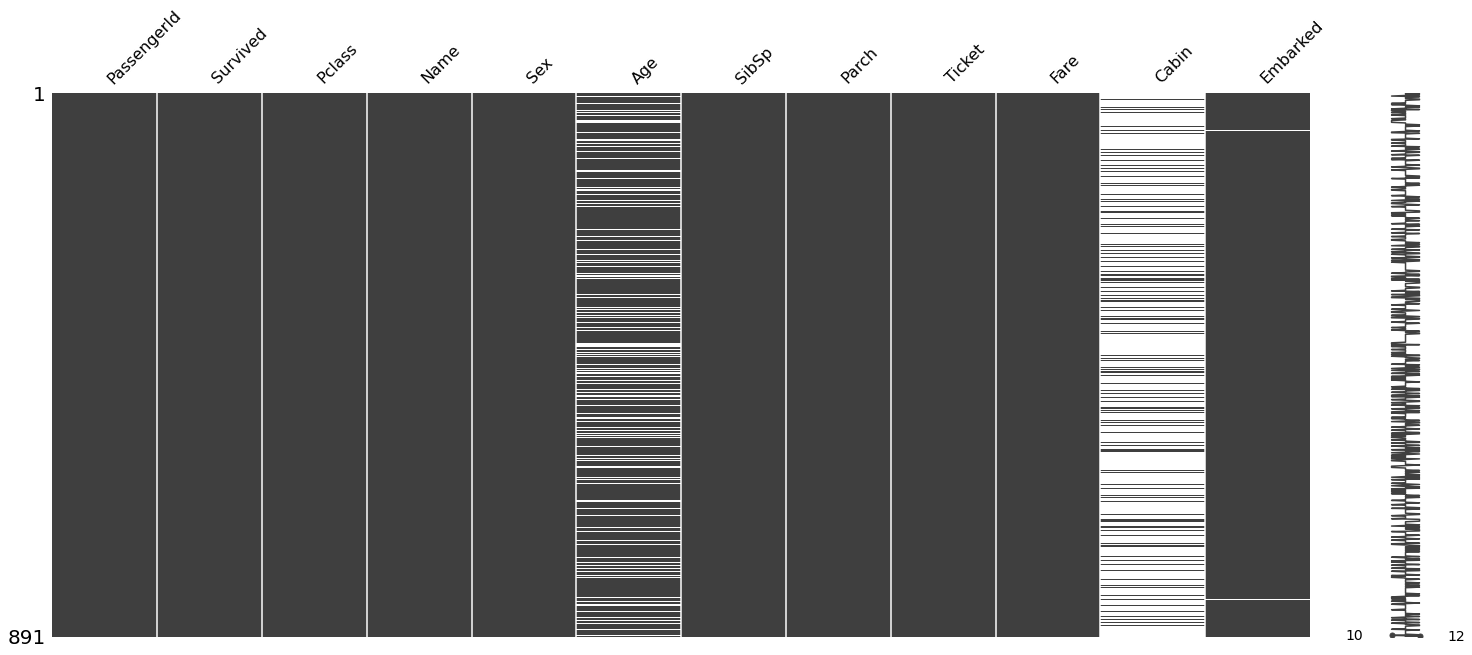

In [5]:
missingno.matrix(train)

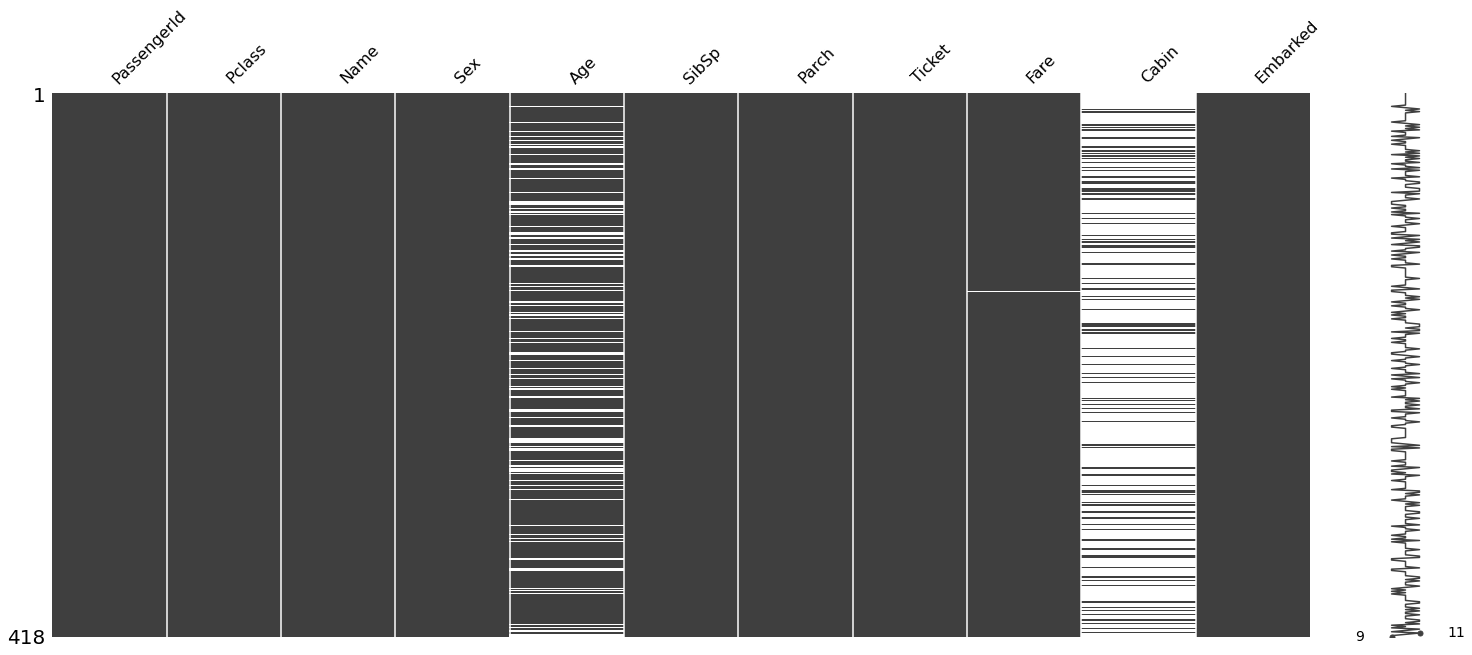

In [6]:
missingno.matrix(test)

In [7]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Feature analysis

### Categorical variables: Overview

Categorical variables in our dataset are Sex, Pclass, SibSp and Embarked.

In [9]:
train.select_dtypes('object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [10]:
train.select_dtypes('number').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


### Categorical variables: Sex

In [11]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

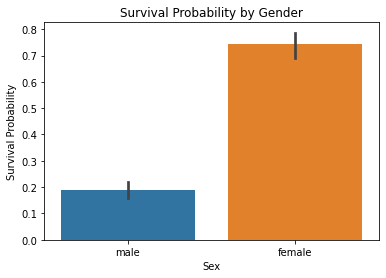

In [12]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

Comment: Female passengers are more likely to survive

### Categorical variables: Pclass

In [13]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

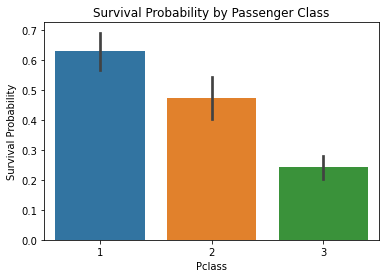

In [14]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

### Categorical variables: Embarked

Text(0.5, 1.0, 'Survival Probability by Point of Embarkment')

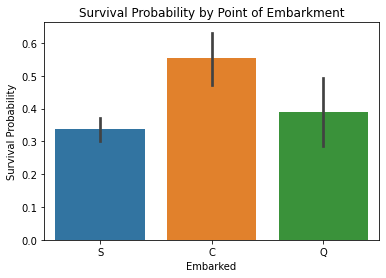

In [15]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkment')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? 

<b> Hypothesis1: </b> The majority of the first class passengers have embarked from location C, as they have the highest survival rate relative to the total population. 

<b> Hypothesis2: </b> More third class passengers embarked from location S because they have the lowest survival rate relative to the total population.

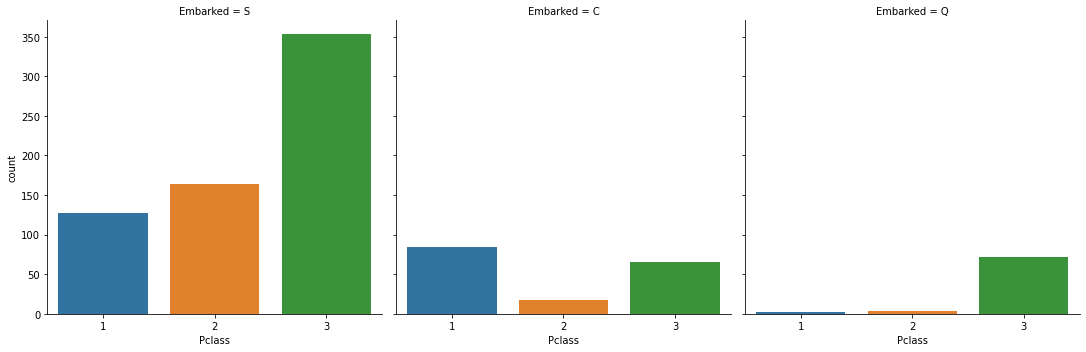

In [16]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

<b> Both Hypotheses are True to a degree. </b> Location S has the most third class passengers, and location C has the most first class passengers. 

### Categorical variables: Embarked

In [17]:
# Mean of survival by point of embarkation

train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by Number of Siblings')

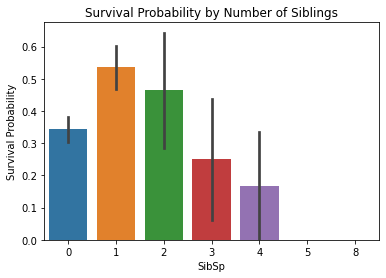

In [18]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Number of Siblings')

In [19]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'Number of Passengers by Number of Siblings')

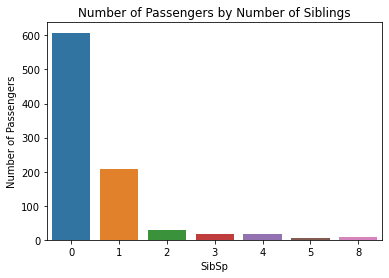

In [20]:
sns.countplot(x = 'SibSp', data = train)
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Number of Siblings')

The survival rates are misleading based on the number of siblings, as the number of passengers with more than 1 sibling is very low. 

This is shown on both visuals.

    1) The standard of error is very large for siblings on chart 1.
    2) The number of passengers on chart 2 confirm the reason for such a large standard of error to be associated with the count of passengers.
<b> This is not a reliable variable </b>

In [21]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

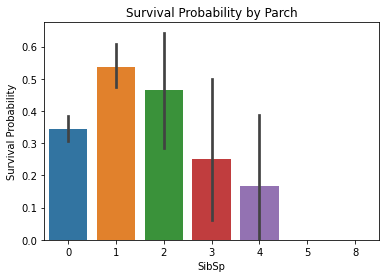

In [22]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [23]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Number of Passengers by Parch')

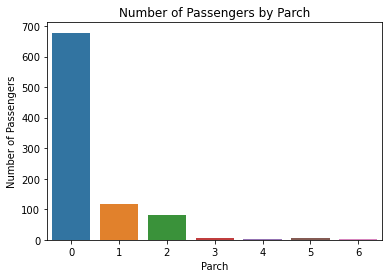

In [24]:
sns.countplot(x = 'Parch', data = train)
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Parch')

The survival rates are misleading based on the number of parents or children on board, as the number of passengers with more than 1 sibling is very low. 

This is shown on both visuals.

    1) The standard of error is very large for passengers on board for chart 1.
    2) The number of passengers on chart 2 confirm the reason for such a large standard of error to be associated with the count of passengers.
<b> This is not a reliable variable </b>

### Categorical variables: Combined (Sex, Pclass, Embarked)

In [25]:
train[['Pclass', 'Sex', 'Survived']].groupby(by=['Pclass', 'Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

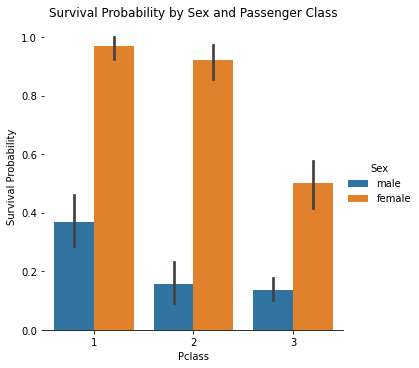

In [26]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

The survival rate changes significantly for both males and females.

    1) Males have a much higher rate over survival for Pclass 1 vs. the others
    2) Females' survival rates drop significantly for Pclass 3 vs. the others

In [27]:
train[['Embarked', 'Sex', 'Survived']].groupby(by=['Embarked', 'Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False).T

,0,2,4,1,5,3
Embarked,C,Q,S,C,S,Q
Sex,female,female,female,male,male,male
Survived,0.876712,0.75,0.689655,0.305263,0.174603,0.0731707


Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

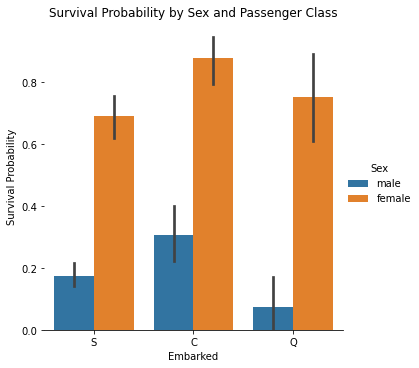

In [28]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

This is consistent above with the two hypotheses when assessing passenger class and embarked.  No further detail needed to assess.

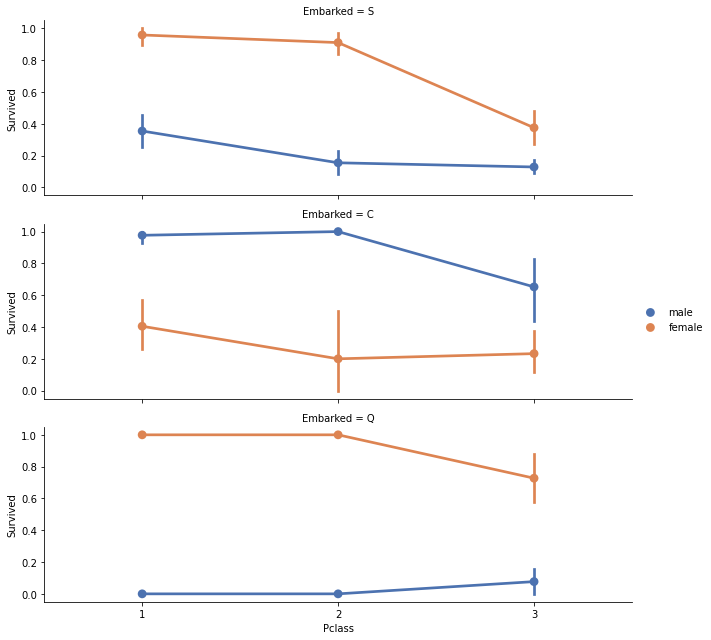

In [29]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', height = 3, aspect = 3)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

##  Numerical variables

Numerical variables in our dataset are Parch, Age and Fare.

In [30]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [31]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [32]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


### Numerical variables correlation with survival

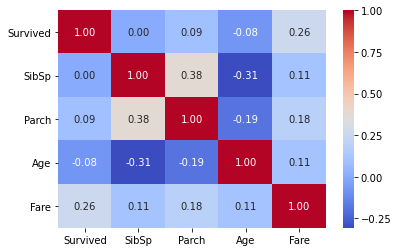

In [33]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

### Numerical variable: Age

In [34]:
def plot_distribution_num(train, train_select, legend) :
    sns.set_style('ticks')
    s = sns.FacetGrid(train, 
                      hue = legend,
                      height = 5,
                      aspect = 1, 
                      palette = {1 : 'Lightblue', 
                                 0 : 'gold'})
    s.map(sns.kdeplot, 
          train_select, 
          shade = True, 
          alpha = 0.8)
    s.set(xlim=(0, 
                train[train_select].max()))
    s.add_legend()
    s.set_axis_labels(train_select, 
                      'proportion')
    s.fig.suptitle(train_select)
    plt.show()

In [35]:
# Null values in Age column 

train['Age'].isnull().sum()

170

In [36]:
# Null values of Fare column 

train['Age'].isnull().sum()

170

In [37]:
# Removed Null values from train1 variable to analyze Age column

train1 = train.loc[train['Age'].notnull()]

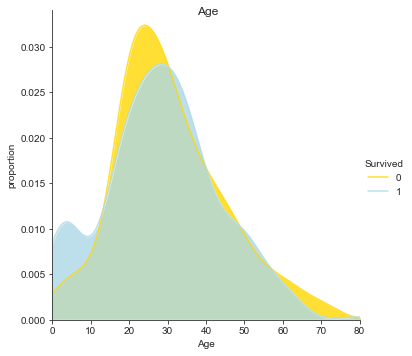

In [38]:
plot_distribution_num(train1, 'Age', 'Survived')

Text(0.5, 1.0, 'Passenger Age Distribution')

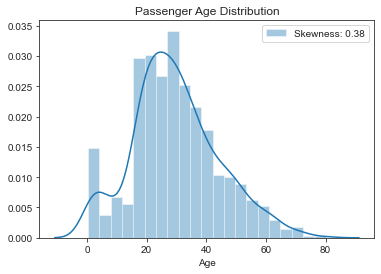

In [39]:
# Passenger age distribution

sns.distplot(train1['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

### Numerical variable: Fare

In [40]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

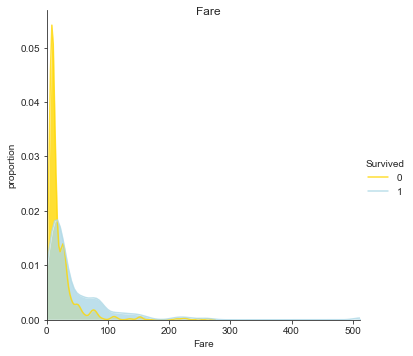

In [41]:
plot_distribution_num(train, 'Fare', 'Survived')

Text(0.5, 1.0, 'Passenger Age Distribution')

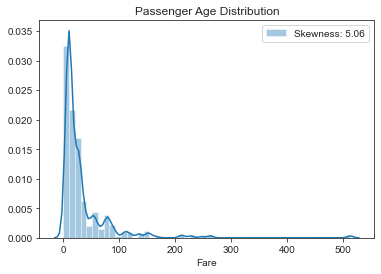

In [42]:
# Passenger age distribution

sns.distplot(train1['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

The significant skewness will be address by using a log transformation for the numberical variable

# Data Exploration - Complete

Export the train dataset to the 'modified' folder to begin the next steps - Data Processing

In [43]:
train.to_csv('../data/modified/train_preperation.csv', index=False)